In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dm.csv')

In [3]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [6]:
x=df.drop(['AmountSpent','Cust_Id'],axis=1)
y=df.AmountSpent

In [10]:
x.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Salary             1000 non-null int64
Children           1000 non-null int64
Catalogs           1000 non-null int64
Age_Middle         1000 non-null uint8
Age_Old            1000 non-null uint8
Age_Young          1000 non-null uint8
Gender_Female      1000 non-null uint8
Gender_Male        1000 non-null uint8
OwnHome_Own        1000 non-null uint8
OwnHome_Rent       1000 non-null uint8
Married_Married    1000 non-null uint8
Married_Single     1000 non-null uint8
Location_Close     1000 non-null uint8
Location_Far       1000 non-null uint8
History_High       1000 non-null uint8
History_Low        1000 non-null uint8
History_Medium     1000 non-null uint8
dtypes: int64(3), uint8(14)
memory usage: 37.2 KB


In [12]:
x=pd.get_dummies(x)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=101)

In [40]:
mod=DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

In [41]:
mod.score(x_test,y_test)

0.6183367847686017

In [42]:
pred=mod.predict(x_test)

In [43]:
a=mod.feature_importances_

In [44]:
se=pd.Series(a,index=x.columns)

In [45]:
se.sort_values( ascending=False)

Salary             0.695279
Catalogs           0.161041
History_Medium     0.056661
History_High       0.054165
History_Low        0.032854
Location_Far       0.000000
Location_Close     0.000000
Married_Single     0.000000
Married_Married    0.000000
OwnHome_Rent       0.000000
Gender_Male        0.000000
Gender_Female      0.000000
Age_Young          0.000000
Age_Old            0.000000
Age_Middle         0.000000
Children           0.000000
OwnHome_Own        0.000000
dtype: float64

In [46]:
import pydotplus
import os
from IPython.display import Image
from sklearn.tree import export_graphviz

In [47]:
os.environ["PATH"]+=os.pathsep+'c:/program files/Graphviz2.38/bin'

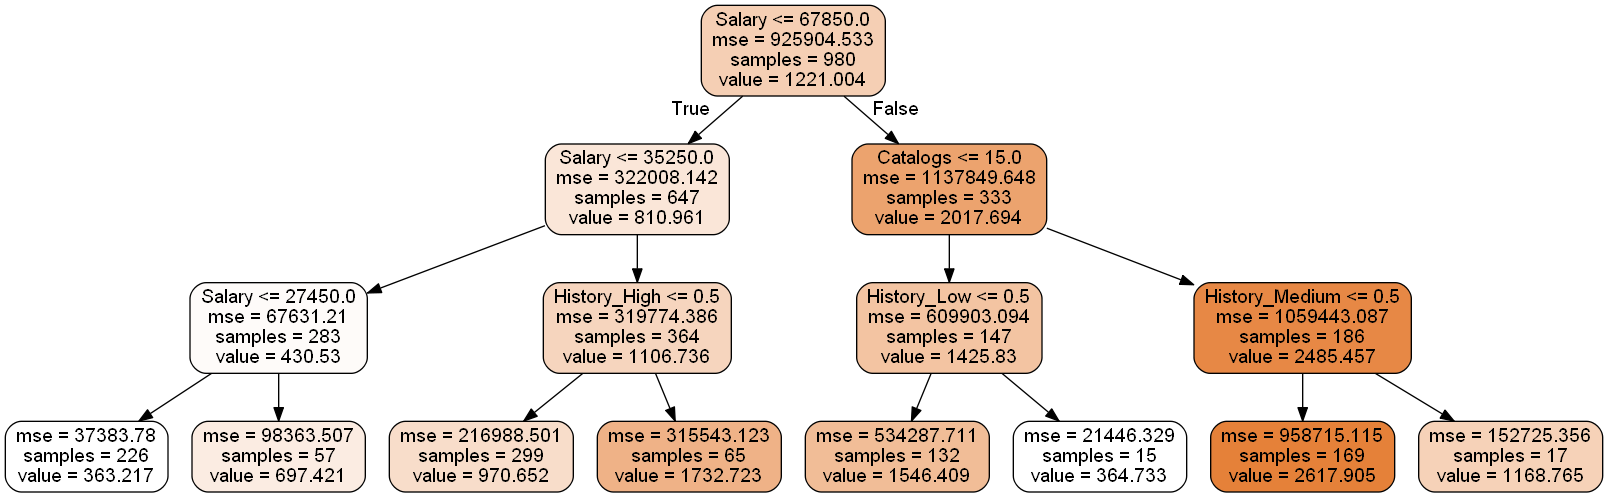

In [54]:
dot_data = export_graphviz(mod,feature_names=x.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 